<a href="https://colab.research.google.com/github/pramit46/Knowledge_Graphs_PoC/blob/main/Knowledge_Graph_PoC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## NetworkX Based

In [1]:
!pip install -q networkx sentence-transformers scikit-learn

  0%|          | 0/1 [00:00<?, ?it/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

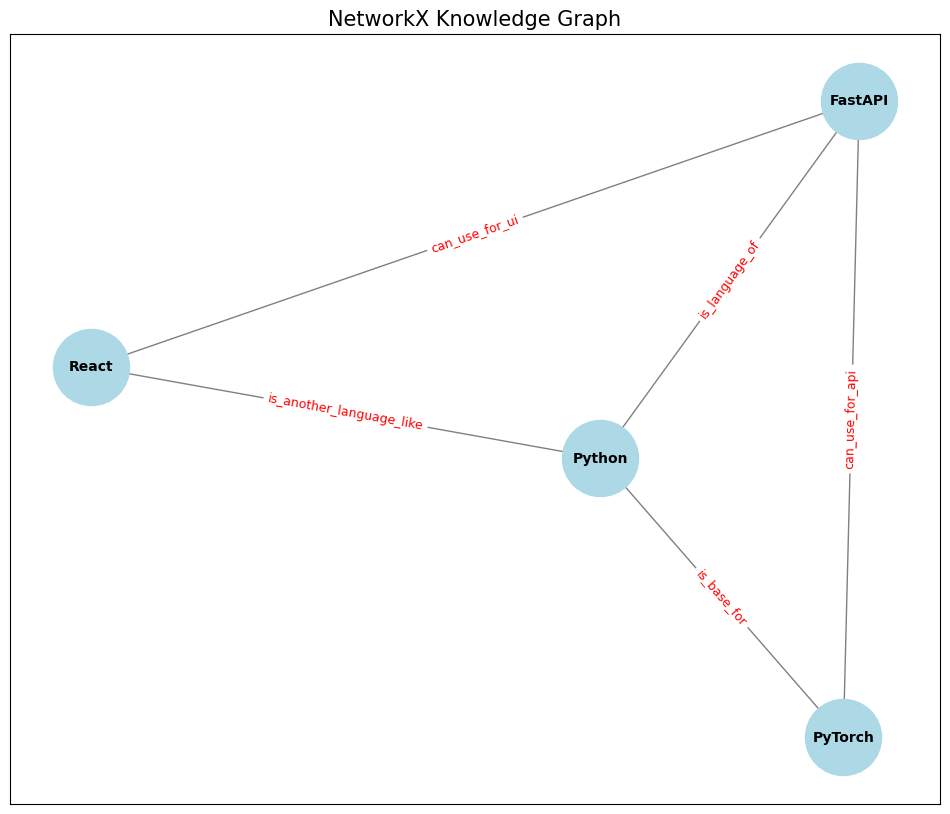

100%|██████████| 1/1 [00:10<00:00, 10.82s/it]


Top Semantic Match: React (Score: 0.31)
Related concepts to React: ['FastAPI']


In [2]:
import networkx as nx
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


for i in tqdm(range(1)):

  # 1. Initialize the embedding model
  model = SentenceTransformer('all-MiniLM-L6-v2')

  # 2. Define our Knowledge Graph
  kg = nx.DiGraph()

  # Add nodes with metadata (descriptions)
  nodes = {
      "Python": "A high-level programming language known for readability.",
      "PyTorch": "A machine learning library for deep learning and neural networks.",
      "React": "A JavaScript library for building user interfaces.",
      "FastAPI": "A modern web framework for building APIs with Python."
  }

  # Explicitly add all nodes to the graph
  for node_name in nodes.keys():
      kg.add_node(node_name)

  # Add relationships (Edges)
  kg.add_edge("Python", "FastAPI", relation="is_language_of")
  kg.add_edge("Python", "PyTorch", relation="is_base_for")
  kg.add_edge("Python", "React", relation="is_another_language_like")
  kg.add_edge("PyTorch", "FastAPI", relation="can_use_for_api")
  kg.add_edge("React", "FastAPI", relation="can_use_for_ui")



  # Visualize the graph
  def visualize_graph(graph):
    plt.figure(figsize=(12, 10))
    # Use spring_layout for better node distribution
    pos = nx.spring_layout(graph, k=0.7, iterations=50)

    # Draw nodes with labels
    nx.draw_networkx_nodes(graph, pos, node_color='lightblue', node_size=3000)
    nx.draw_networkx_labels(graph, pos, font_size=10, font_weight='bold')

    # Draw edges with labels
    nx.draw_networkx_edges(graph, pos, edge_color='gray', arrowsize=20)
    edge_labels = nx.get_edge_attributes(graph, 'relation')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='red', font_size=9)

    plt.title("NetworkX Knowledge Graph", size=15)
    plt.axis('on')
    plt.show()

  visualize_graph(kg)

  # 3. Generate and store embeddings for each node3
  node_embeddings = {}
  for node, description in nodes.items():
      embedding = model.encode(description)
      kg.nodes[node]['embedding'] = embedding
      node_embeddings[node] = embedding
      print(f"Embedding for {node}: {embedding}")

  # 4. Search the Knowledge Graph using Vectors
  def search_kg(query, top_k=1):
      query_vec = model.encode([query])

      similarities = {}
      for node in kg.nodes:
          node_vec = kg.nodes[node]['embedding'].reshape(1, -1)
          sim = cosine_similarity(query_vec, node_vec)[0][0]
          similarities[node] = sim

      # Sort by similarity
      sorted_nodes = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
      return sorted_nodes[:top_k]

  # Test the semantic search
  result = search_kg("What can help me in webdesign") #NOTE how none of the words used here is mentioned in the graph (neither nodes or edges, yet it manages to answer correctly)
  print(f"\nTop Semantic Match: {result[0][0]} (Score: {result[0][1]:.2f})")

  # Navigate the graph from that match
  match = result[0][0]
  neighbors = list(kg.neighbors(match))
  print(f"Related concepts to {match}: {neighbors}")

## Neo4j Based

In [ ]:
!pip install -q langchain-neo4j langchain-openai python-dotenv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.8/84.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.3/325.3 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.2/222.2 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.1/329.1 kB 20.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.


### Build The Graph

In [ ]:
import os
from langchain_neo4j import Neo4jGraph, Neo4jVector, LLMGraphTransformer
from langchain_openai import ChatOpenAI, OpenAIEmbeddings
from langchain_core.documents import Document

# 1. Setup Connection
os.environ["NEO4J_URI"] = "bolt://localhost:7687"
os.environ["NEO4J_USERNAME"] = "neo4j"
os.environ["NEO4J_PASSWORD"] = "password"

graph = Neo4jGraph()
llm = ChatOpenAI(model="gpt-4o", temperature=0)
transformer = LLMGraphTransformer(llm=llm)

# 2. Extract Entities & Relationships from Text
text = "Apple was founded by Steve Jobs in California. Apple created the iPhone."
docs = [Document(page_content=text)]
graph_documents = transformer.convert_to_graph_documents(docs)

# 3. Save to Neo4j
graph.add_graph_documents(graph_documents)

# 4. Create a Vector Index on the Nodes
# This allows us to search the Graph using Embeddings
vector_index = Neo4jVector.from_existing_graph(
    OpenAIEmbeddings(),
    index_name="entity_index",
    node_label="Entity",        # Labels created by the transformer
    text_node_properties=["id"], # The property to embed (usually the entity name)
    embedding_node_property="embedding"
)

ImportError: cannot import name 'LLMGraphTransformer' from 'langchain_neo4j' (/usr/local/lib/python3.12/dist-packages/langchain_neo4j/__init__.py)

### Query the graph

In [ ]:
def hybrid_query(user_query):
    # Step A: Use Vector Search to find the most relevant entity
    results = vector_index.similarity_search(user_query, k=1)
    if not results: return "No match found."

    entity_name = results[0].page_content
    print(f"Found Entity: {entity_name}")

    # Step B: Traverse the graph to find relationships for that entity
    cypher_query = f"""
    MATCH (e:Entity {{id: $name}})-[r]->(neighbor)
    RETURN e.id + ' ' + type(r) + ' ' + neighbor.id AS relationship
    """

    context = graph.query(cypher_query, params={"name": entity_name})
    return context

# Test it
answer = hybrid_query("Tell me about the founder of Apple")
print(answer)
# Output: [{'relationship': 'Apple FOUNDED_BY Steve Jobs'}, ...]